In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

<img style="align-self: center;" src="https://www.alura.com.br/assets/img/imersoes/general/og-bootcamps-alura.1616501197.png" style="width: 50%">
<h1 style="text-align: center; font-weight: bold;">Alura Bootcamps - Data Science 2020</h1>
<h2 style="text-align: center; font-weight: bold;">Final Project人</h2>

<br> 

---
**Date:** April, 2021  
**Github:** [fmp95](https://github.com/fmp95)

# **Table of Contents**
- [Preparation](#Preparation)
    - [Libraries Imports](#Libraries-Imports)
    - [Customizing Layout](#Customizing-Layout)
    - [Check and Download Dataset](#Check-and-Download-Dataset)
    - [Loading and Cleaning Dataset](#Loading-and-Cleaning-Dataset)
- [Introduction](#Introduction)
    - [The Problem](#The-Problem)
    - [Trying to Help](#Trying-to-Help)
- [Analysing the Data](#Analysing-the-Data)
    - [Patients' Profiles](#Patients'-Profiles)
        - [Age](#Age)
        - [Gender](#Gender)
        - [Disease Grouping](#Disease-Grouping)
- [References](#References)

# **Preparation**

## **Libraries Imports**

In [2]:
from os.path import isfile, isdir, join

import matplotlib as mpl
import numpy as np
from IPython.display import display, HTML
from matplotlib import pyplot as plt
from pandas import read_excel

from custom.matplotlib_style import matplotlib_style

<IPython.core.display.Javascript object>

## **Customizing Layout**

In [3]:
# Loading Custom CSS for Notebook Theme
with open("custom/notebook.css", "r") as file:
    notebook_css = HTML(f"<style>{file.read()}</style>")

    display(notebook_css)

# Load Custom Matplotlib Theme
mpl.rcParams.update(matplotlib_style)

<IPython.core.display.Javascript object>

## **Check and Download Dataset**
To simplify the reproducibility and guarantee project structure, folders and files are created and downloaded automatically utilizing well known programs, such as wget, and common terminal commands.

**Make sure you have wget installed, otherwise you will need to install the dataset to */src* folder and rename it to *dataset.xlsx***  
**Since the dataset is hosted by another GitHub user, it may not be available at today's date**

In [4]:
# Creating src folder if it doesn't exist
directory = "files"

if not isdir(directory):
    !mkdir $directory

    assert isdir(directory)
    print("Folder created with success!")

else:
    print("Folder already exists!")

Folder already exists!


<IPython.core.display.Javascript object>

In [5]:
# Downloading dataset if it doesn't exist
dataset_file = "dataset.xlsx"
file_path = join(directory, dataset_file)

if not isfile(file_path):
    url = (
        "https://github.com/alura-cursos/covid-19-clinical"
        + "/raw/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx"
    )

    !wget -O $file_path $url

    assert isfile(file_path)
    print("Dataset downloaded with success!")

else:
    print("Dataset already exists!")

Dataset already exists!


<IPython.core.display.Javascript object>

## **Loading and Cleaning Dataset**

In [6]:
# Load dataset into a dataframe
dataset = read_excel(file_path, engine="openpyxl")

# Lowercase column names and replace whitespaces for underscores
dataset.columns = [column.lower().replace(" ", "_") for column in dataset.columns]

# Print head of dataframe
dataset.head()

,patient_visit_identifier,age_above65,age_percentil,gender,disease_grouping_1,disease_grouping_2,disease_grouping_3,disease_grouping_4,disease_grouping_5,disease_grouping_6,...,temperature_diff,oxygen_saturation_diff,bloodpressure_diastolic_diff_rel,bloodpressure_sistolic_diff_rel,heart_rate_diff_rel,respiratory_rate_diff_rel,temperature_diff_rel,oxygen_saturation_diff_rel,window,icu
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


<IPython.core.display.Javascript object>

# Introduction

## The Problem

COVID-19 is a contagious disease caused by the coronavirus 2 (SARS-CoV-2) [[1]](#ref_1). Since it's deadly, can spread easily and there's still no effective treatment or cure to it [[2]](#ref_2), hospitals are very sensitive to overload. To avoid that problem, it'd be vital to know which patients would need extra medical attention. Some conditions were already listed by health authorities, an people that have any of those conditions may need extra care [[3]](#ref_3). Some of them are:

- Cancer
- Chronic Kidney Disease
- Chronic Lung  Diseases
- Diabetes
- Heart Conditions
- HIV
- Overweight
- Smoking

According to the patient's profile, we can try to predict if they will need extra care or not. **Note that this disease is extremely deadly, so we need to be extra careful with our predictions. We need to make sure we don't underestimate the capability of one patient to need extra medical care.**

## Trying to Help
Sírio Libanês is a well-known Brazilian hospital and they separated some anonymous clinical data for study and for people to try to develop a model to predict the outcome of a patient [[4]](#ref_4). Our objective in this document is try to select some conditions related to patients, in the data they made available, and try to predict if new patients would need extra care based on the information gathered by the study subjects.

# Analysing the Data
First thing we can do is try to understand the profile of patients the were sent to ICU due to COVID-19. In our data, we have a column name *icu* which contain the following values:

|Value|Meaning|
|-|-|
|0|Patient wasn't sent to ICU|
|1|Patient was sent to ICU|

Some fields we can analyse are: *age*, *gender* and *disease grouping*.

## Patients' Profiles

### Age

In [7]:
# Getting count of ages

# Selecting only the first entry for each unique identifier and there were sent to ICU
patients = dataset[dataset.icu == 1].groupby("patient_visit_identifier").first()

# Count patients withing age percentil
patients = patients["age_percentil"].value_counts().sort_index()

patients

10th          10
20th          12
30th          18
40th          15
50th          20
60th          20
70th          22
80th          26
90th          23
Above 90th    29
Name: age_percentil, dtype: int64

<IPython.core.display.Javascript object>

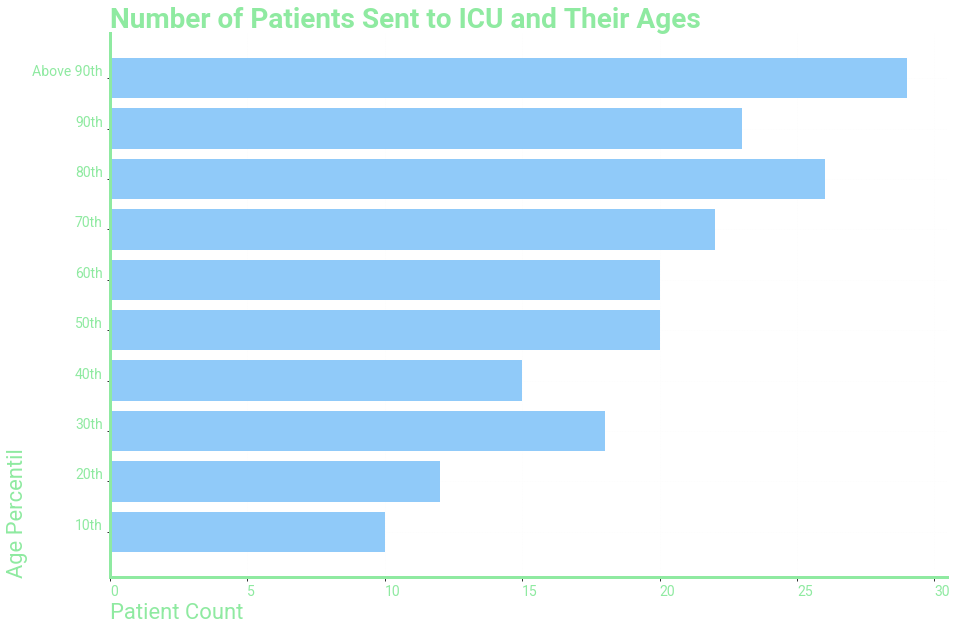

<IPython.core.display.Javascript object>

In [8]:
# Select data
index = patients.index
value = patients.values

# Create figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create horizontal bar plot
axis.barh(index, value, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Ages")
axis.set_ylabel("Age Percentil")
axis.set_xlabel("Patient Count")

plt.show(figure)

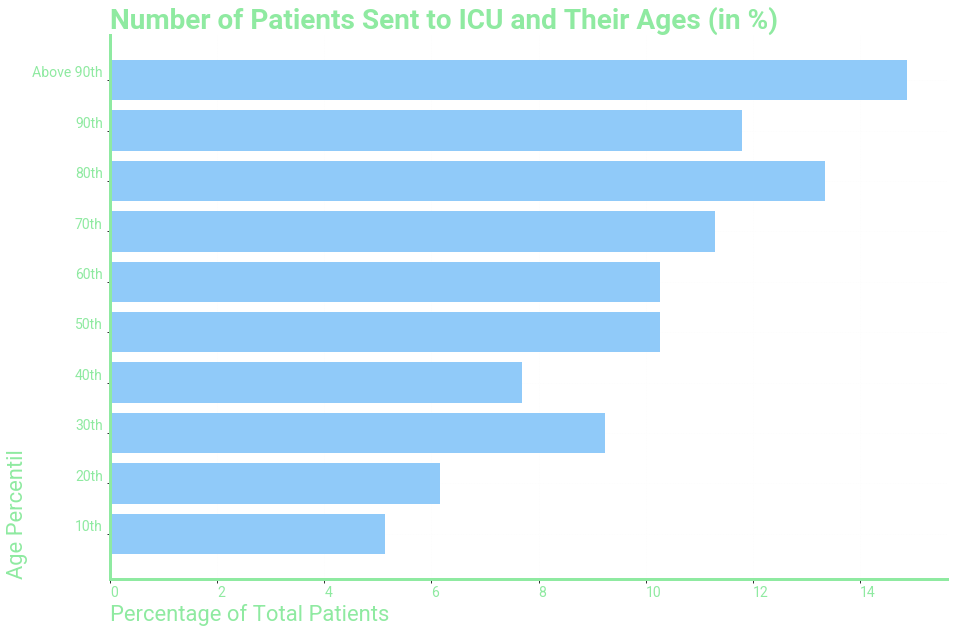

<IPython.core.display.Javascript object>

In [9]:
# Sum number of patients
sum = np.sum(value)

# Create figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create horizontal bar plot
axis.barh(index, (value / sum) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Ages (in %)")
axis.set_ylabel("Age Percentil")
axis.set_xlabel("Percentage of Total Patients")

plt.show(figure)

It's clear to see that age is a condition that worsens the symptoms of COVID-19, leading the patient to need extra care and being sent to ICU.

### Gender

In [10]:
# Getting count of genders

# Selecting only the first entry for each unique identifier and there were sent to ICU
patients = dataset[dataset.icu == 1].groupby("patient_visit_identifier").first()

# Count patients withing age percentil
patients = patients["gender"].value_counts().sort_index()

# Create label for each gender
gender = {0: "Gender 1", 1: "Gender 2"}

patients

0    135
1     60
Name: gender, dtype: int64

<IPython.core.display.Javascript object>

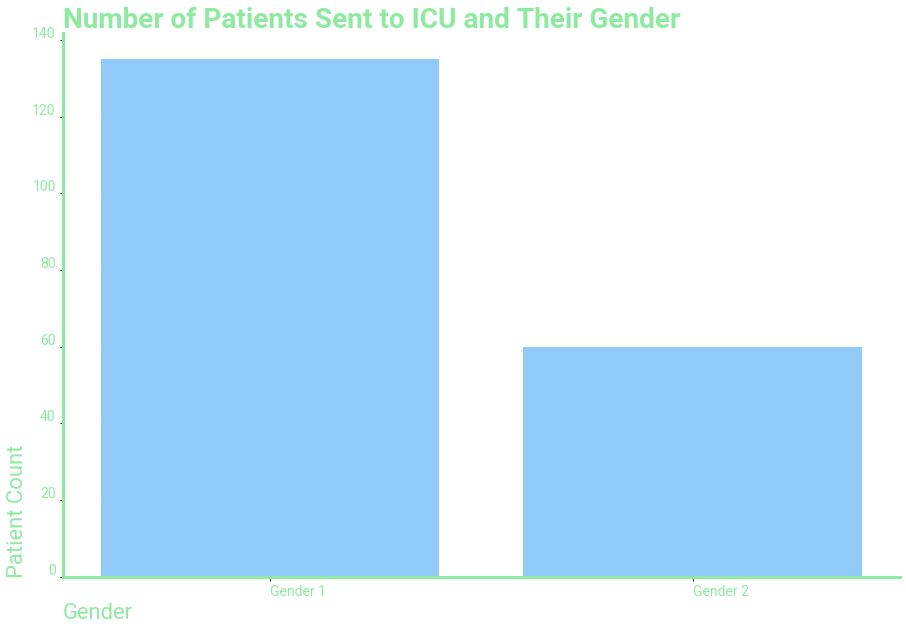

<IPython.core.display.Javascript object>

In [11]:
# Select data
index = [gender[gender_num] for gender_num in patients.index]
value = patients.values

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create bar plot
axis.bar(index, value, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Gender")
axis.set_xlabel("Gender")
axis.set_ylabel("Patient Count")

plt.show(figure)

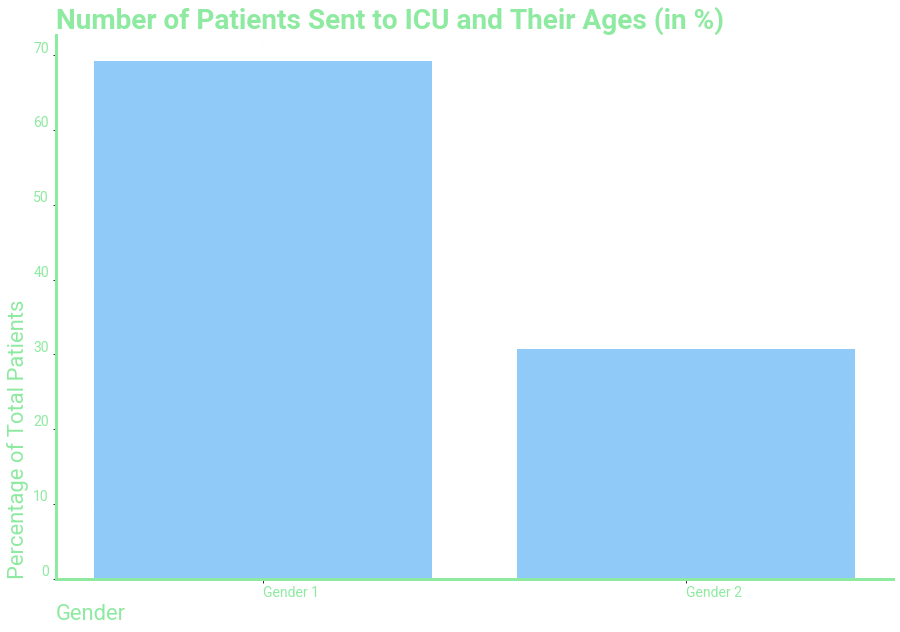

<IPython.core.display.Javascript object>

In [12]:
# Sum patients count
sum = np.sum(value)

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create a bar plot
axis.bar(index, (value / sum) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Ages (in %)")
axis.set_xlabel("Gender")
axis.set_ylabel("Percentage of Total Patients")

plt.show(figure)

According to some researches, men are dying more than women of COVID-19 [[5]](#ref-5). The ratio we encounter here, is close to one survey done in China last year [[6]](#ref-6):

> In the largest survey of 72,314 suspected or confirmed cases of COVID-19 in China (men, 63.8% of cases; women, 36.2% of cases), the case-fatality ratio was higher among men (2.8%) than among women (1.7%)

### Disease Grouping

In [13]:
# Getting count of patients for each disease grouping

patients = (
    dataset[dataset.icu == 1]
    .groupby("patient_visit_identifier")
    .first()[
        [
            "disease_grouping_1",
            "disease_grouping_2",
            "disease_grouping_3",
            "disease_grouping_4",
            "disease_grouping_5",
        ]
    ]
)

patients_count = patients.shape[0]
patients = patients.sum()

patients

disease_grouping_1    25.0
disease_grouping_2    11.0
disease_grouping_3    29.0
disease_grouping_4     8.0
disease_grouping_5    36.0
dtype: float64

<IPython.core.display.Javascript object>

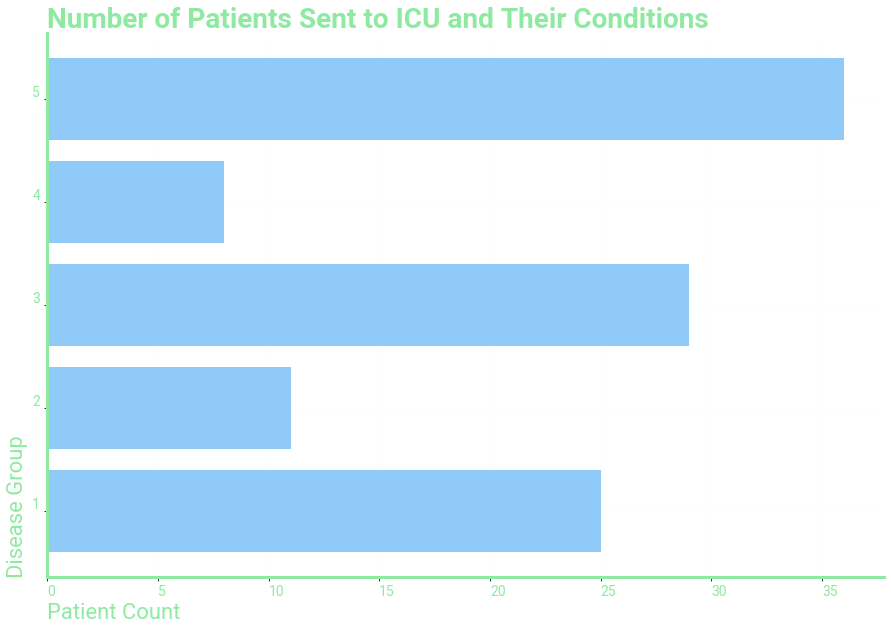

<IPython.core.display.Javascript object>

In [14]:
# Select data
index = [group[-1:] for group in patients.index]
value = patients.values

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create bar plot
axis.barh(index, value, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Conditions")
axis.set_ylabel("Disease Group")
axis.set_xlabel("Patient Count")

plt.show(figure)

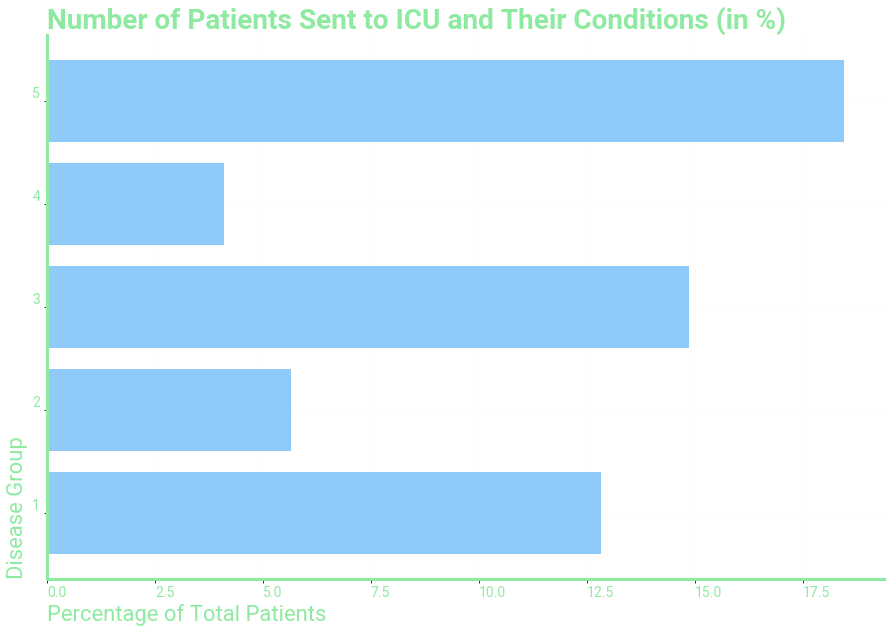

<IPython.core.display.Javascript object>

In [15]:
# Create figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create horizontal bar plot
axis.barh(index, (value / patients_count) * 100, zorder=2)

# Set labels
axis.set_title("Number of Patients Sent to ICU and Their Conditions (in %)")
axis.set_ylabel("Disease Group")
axis.set_xlabel("Percentage of Total Patients")

plt.show(figure)

To have a better idea if any of these disease groups have influence on the conditions of the patient to be sent to the ICU, we can compare with the count of patients that weren't sent to ICU.

In [16]:
# Getting count of patients for each disease grouping

columns = [
    "disease_grouping_1",
    "disease_grouping_2",
    "disease_grouping_3",
    "disease_grouping_4",
    "disease_grouping_5",
    "icu",
]

patients = dataset.groupby("patient_visit_identifier").last()[columns]

columns.remove("icu")

patients_icu = patients[patients.icu == 1][columns].sum()
patients_not_icu = patients[patients.icu == 0][columns].sum()

<IPython.core.display.Javascript object>

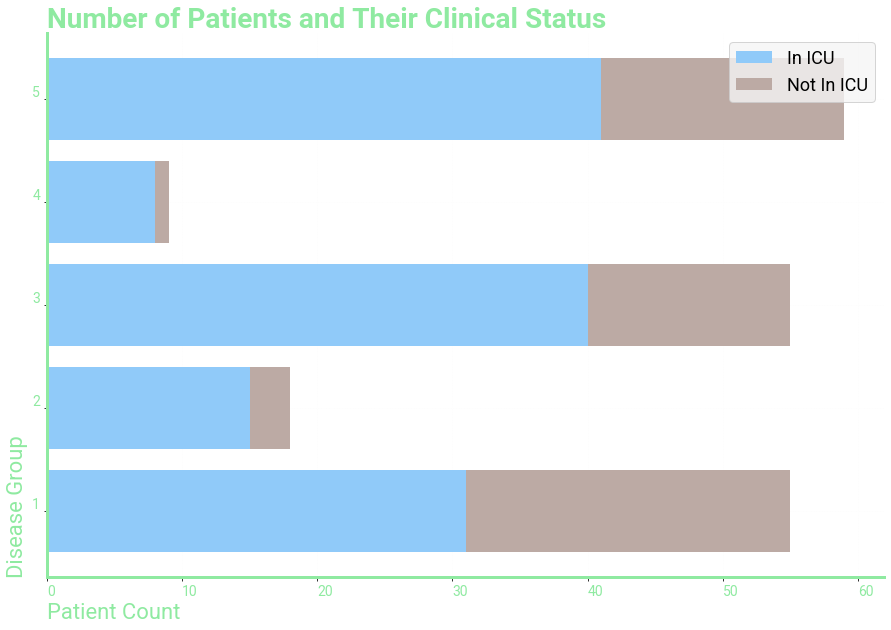

<IPython.core.display.Javascript object>

In [17]:
index = [group[-1:] for group in patients_icu.index]

# Create a figure
figure = plt.figure()

# Create a subplot
axis = figure.subplots(1)

# Create bar plot
axis.barh(index, patients_icu.values, zorder=2, label="In ICU")
axis.barh(
    index,
    patients_not_icu.values,
    zorder=2,
    left=patients_icu.values,
    label="Not In ICU",
)

# Set labels
axis.set_title("Number of Patients and Their Clinical Status")
axis.set_ylabel("Disease Group")
axis.set_xlabel("Patient Count")

plt.legend()

plt.show(figure)

# References

<a id="ref_1"></a>[1] 'COVID-19'  
**Wikipedia**  
Available at https://en.wikipedia.org/wiki/COVID-19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_2"></a>[2] 'Treatment and management of COVID-19'  
**Wikipedia**  
Available at https://en.wikipedia.org/wiki/Treatment_and_management_of_COVID-19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_3"></a>[3] 'Certain Medical Conditions and Risk for Severe COVID-19 Illness'  
**Centers for Disease Control and Prevention**  
Available at https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/people-with-medical-conditions.html (Accessed : 2021-04-06)
<br><br>
<a id="ref_4"></a>[4]  'COVID-19 - Clinical Data to assess diagnosis'  
**Kaggle**  
Available at https://www.kaggle.com/S%C3%ADrio-Libanes/covid19 (Accessed: 2021-04-06)
<br><br>
<a id="ref_5"></a>[5]  'Men and COVID-19: A Biopsychosocial Approach to Understanding Sex Differences in Mortality and Recommendations for Practice and Policy Interventions'  
**Derek M. Griffith, PhD; Garima Sharma, MD; Christopher S. Holliday, PhD, MPH; Okechuku K. Enyia, MPH; Matthew Valliere, MPA; Andrea R. Semlow, MS, MPH; Elizabeth C. Stewart, DrPH, MSPH; Roger Scott Blumenthal, MD**  
Published: 2020-07-16  
Available at https://www.cdc.gov/pcd/issues/2020/20_0247.htm (Accessed: 2021-04-06)
<br><br>
<a id="ref_6"></a>[6]  'Epidemiology Working Group for NCIP Epidemic Response, Chinese Center for Disease Control and Prevention.'  
**Zhonghua Liu Xing Bing Xue Za Zhi**  
Published: 2020-02-10  
Available at https://pubmed.ncbi.nlm.nih.gov/32064853/ (Accessed: 2021-04-06)